In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from numpy import median
from nltk import pos_tag
from nltk.corpus import wordnet

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.preprocessing import sequence
from keras.models import Model

In [2]:
data = pd.read_csv('../input/spam-text-message-classification/SPAM text message 20170820 - Data.csv', encoding= 'latin-1')
data['len'] = data['Message'].apply(len)
data.head()

,Category,Message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


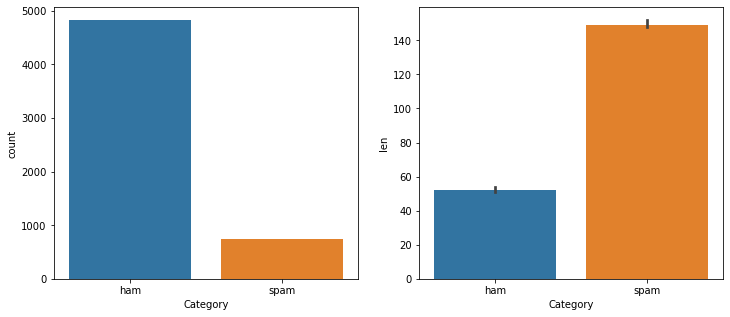

In [3]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data['Category'])
plt.subplot(1,2,2)
sns.barplot(y=data['len'],x=data['Category'],data=data, estimator=median)

In [4]:
def preprocess(text):
    text = text.translate(str.maketrans('','', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

def denoise_text(text):
    text = preprocess(text)
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [ ]:
data['C_Message'] = data['Message'].apply(denoise_text)
data.head()

In [ ]:
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})
data.head()

In [ ]:
X = data['C_Message']
Y = data['Category']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

vect = TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
x_train = vect.fit_transform(x_train)
x_test = vect.transform(x_test)
print(x_train.shape)
print(x_test.shape)

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

score = []
for i,j in enumerate([svc,knc,mnb,dtc,lrc,rfc,abc,bc,etc]):
    j.fit(x_train,y_train)
    pred = j.predict(x_test)
    score.append([accuracy_score(y_test,pred)])


In [ ]:
lab = {'SVM': [score[0]],'KNeighborClassifier': [score[1]],'MultinomialNB':[score[2]],
      'DecisionTreeClassifier':[score[3]],'LogisticRegression':[score[4]],
      'RandomForestClassifier':[score[5]],'Adaboost':[score[6]],'BaggingClassifier':[score[7]],
      'ExtraTreesClassifier':[score[8]]}

result = pd.DataFrame(lab, columns = ['SVM','KNeighborClassifier', 'MultinomialNB',
                                  'DecisionTreeClassifier','LogisticRegression','RandomForestClassifier',
                                  'Adaboost','BaggingClassifier','ExtraTreesClassifier'])
np.transpose(result.head())